Hypothesis & Questions:
    - age
    - credit score?
    - number of products
    

# I. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# II. Load and Understand dataset

In [2]:
file_name = "/Users/huuthinle/Downloads/Churn Modeling.csv"
df = pd.read_csv(file_name)
df = pd.DataFrame(df)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Handle Missing Values

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Notes: There's no missing values in this dataset. In case of existing missing values, imputation techniques (mean, median, mode) or data remowals would be applied to deal with missing values

# IV. Explore Data Distribution


## 1. Univariate Analysis 

### Total Bank Churn Rate - Target Variable

In [28]:
churn_member_count = df[df['Exited'] == 1].shape[0]
customer_count = df['Exited'].count()

churn_rate = churn_member_count*100/customer_count
print (f'Number of churn_member_count:{churn_member_count}')
print(f'Total bank churn rate: {churn_rate}%')

Number of churn_member_count:2037
Total bank churn rate: 20.37%


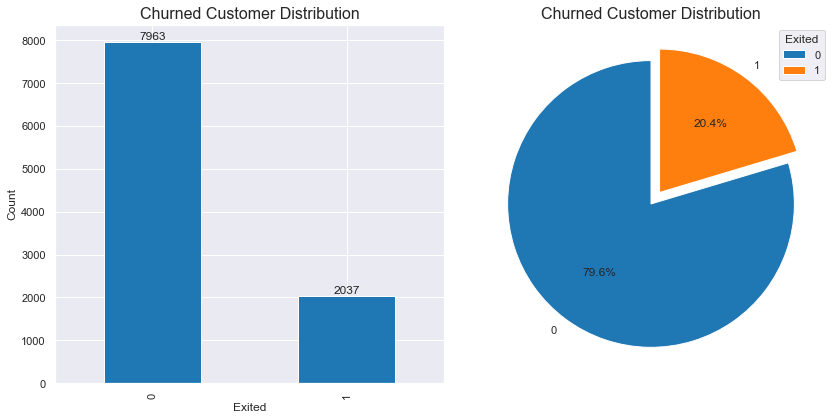

In [29]:
# Count the values for 'Exited'
count = df['Exited'].value_counts()
sns.set_palette('tab10')
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns


# Bar plot for Churned Customer Distribution
count.plot(kind='bar', ax=ax[0])
ax[0].bar_label(ax[0].containers[0], labels=count.values, fontweight="light", fontsize=12)
ax[0].set_title("Churned Customer Distribution", fontsize=16, fontweight='ultralight')
ax[0].set_xlabel("Exited")
ax[0].set_ylabel("Count")

# Pie chart for Churned Customer Distribution
ax[1].pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1])
ax[1].set_title("Churned Customer Distribution", fontsize=16, fontweight='ultralight')
ax[1].legend(count.index, title="Exited", loc="upper right")


# Adjust layout and show the plot
plt.tight_layout()
plt.show()


> Findings: 
The charts indicate that 20.37% of customers have churned. The business's objective is to address this high churn rate.

### Geography Variable

In [30]:
num_country = len(df['Geography'].unique())
print (f"Number of countries: {num_country}")
print(f"Unique values: {df['Geography'].unique()}")

Number of countries: 3
Unique values: ['France' 'Spain' 'Germany']


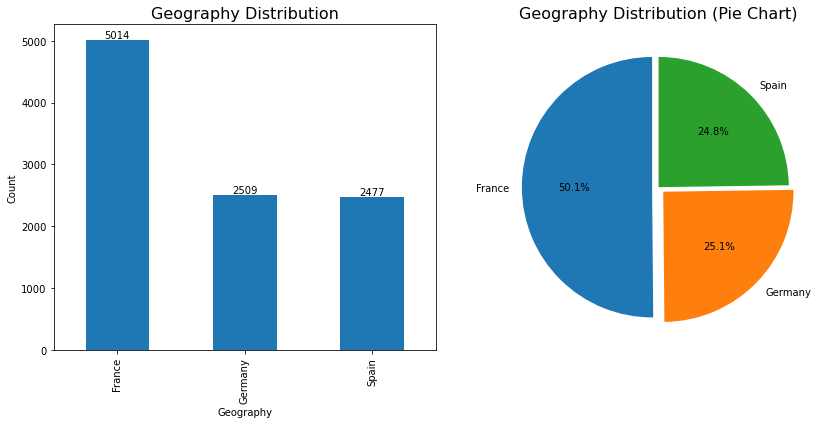

In [13]:
geo_count = df['Geography'].value_counts()
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
sns.set_palette('tab10')

# Bar plot for Geography distribution
geo_count.plot(kind='bar', ax=ax[0])
ax[0].bar_label(ax[0].containers[0], labels=geo_count.values, fontweight="light", fontsize=10)
ax[0].set_title("Geography Distribution",  fontsize=16, fontweight= 'ultralight')
ax[0].set_xlabel("Geography")
ax[0].set_ylabel("Count")

ax[1].pie(geo_count, labels=geo_count.index,autopct='%1.1f%%', startangle=90, explode = [0.05,0.05,0])
ax[1].set_title("Geography Distribution (Pie Chart)", fontsize=16, fontweight= 'ultralight')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


> Findings: Half of bank customers comes from France, while there is no big gap for Spain and Germany, with 24,8% and 25,1% respectively.


## Age Column

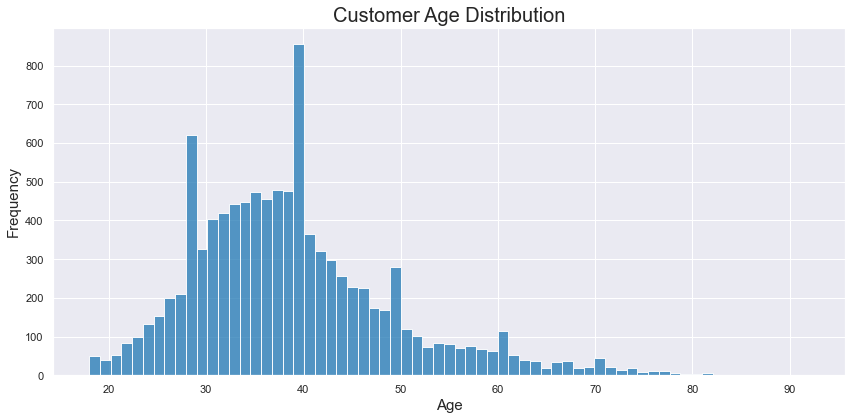

In [209]:
plt.figure(figsize = (12,6))
sns.histplot(data = df, x = 'Age')
sns.set_palette('tab10')

plt.title ('Customer Age Distribution', size = 20)
plt.ylabel ('Frequency', size = 15)
plt.xlabel ('Age', size = 15)
plt.tight_layout()

- The age distribution is concentrated around 30–50 years, with fewer customers in the older age range.
- This suggests that most customers are middle-aged, which might be relevant depending on the bank’s target demographic.

## Credit Score

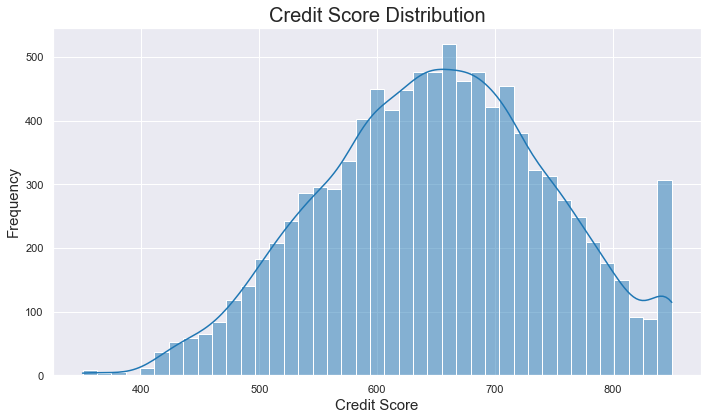

In [33]:
plt.figure (figsize = (10,6))

sns.set_theme(style="darkgrid")
sns.set_palette('tab10')

sns.histplot(x = df['CreditScore'], kde=True)
plt.title ('Credit Score Distribution', size = 20)
plt.ylabel('Frequency', size = 15)
plt.xlabel ('Credit Score', size = 15)
plt.tight_layout()

> Findings: The Credit Score Distribution is slightly skewed to the right.

## Tenure Column

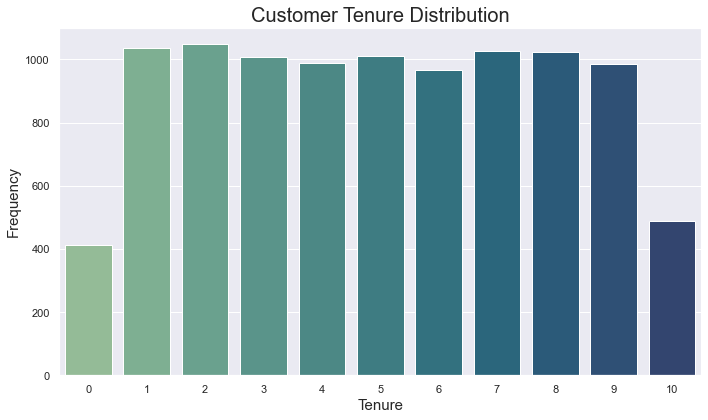

In [210]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tenure', palette = "crest")

# Title and labels
plt.title('Customer Tenure Distribution', size=20)
plt.ylabel('Frequency', size=15)
plt.xlabel('Tenure', size=15)

plt.tight_layout()

# Show the plot
plt.show()

* A balance on customer base across the tenure length

## Balance Column

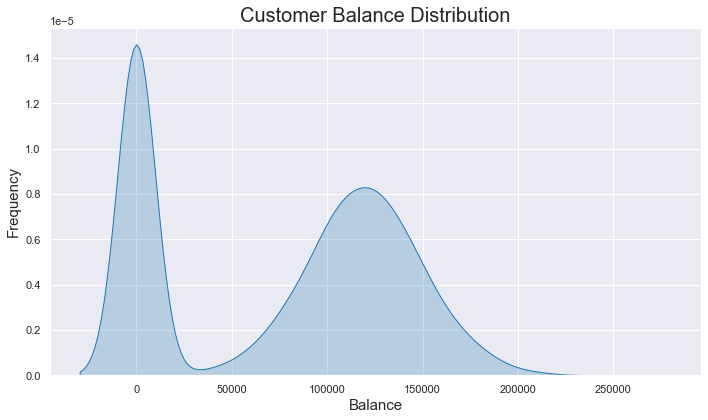

In [211]:
# Create the countplot

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Balance',fill=True)
sns.set_palette('tab10')
# Title and labels
plt.title('Customer Balance Distribution', size=20)
plt.ylabel('Frequency', size=15)
plt.xlabel('Balance', size=15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

There is bimodal distribution on customer balance base.
This draws a question about customer segments whether 
* low-balance customers may be more likely to churn
* High-balance customers who are likely more engaged and loyal.

## EstimatedSalary Column

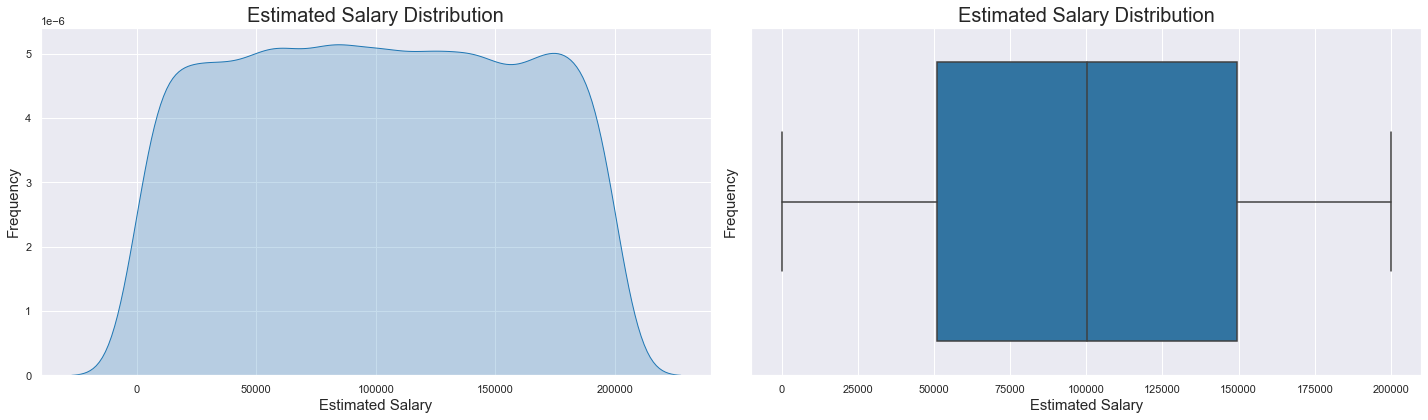

In [36]:
fig, ax =plt.subplots(1, 2, figsize=(20, 6))

sns.kdeplot(data=df, x='EstimatedSalary', ax=ax[0], fill = True)
sns.set_palette('tab10')
# Title and labels for the boxplot
ax[0].set_title('Estimated Salary Distribution', size=20)
ax[0].set_ylabel('Frequency', size=15)
ax[0].set_xlabel('Estimated Salary', size=15)

# Create a countplot or boxplot
sns.boxplot(data=df, x='EstimatedSalary', ax=ax[1])

# Title and labels for the boxplot
ax[1].set_title('Estimated Salary Distribution', size=20)
ax[1].set_ylabel('Frequency', size=15)
ax[1].set_xlabel('Estimated Salary', size=15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

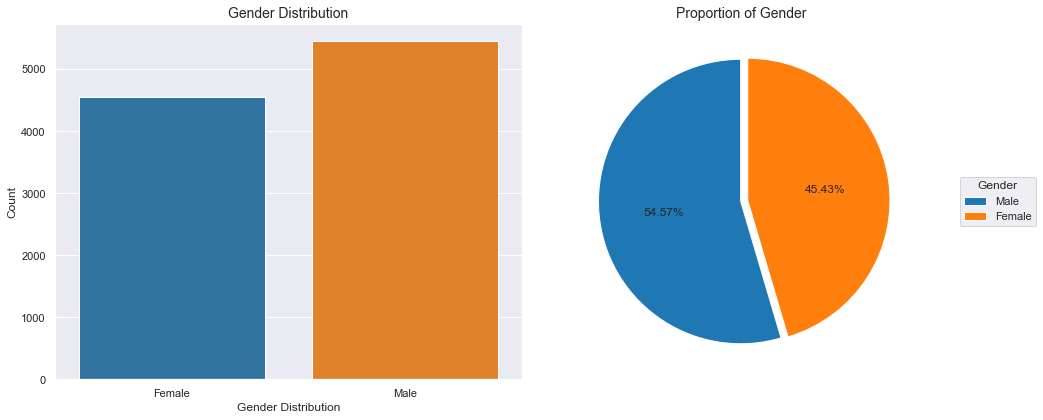

In [37]:
# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # Correct function name is `plt.subplots`
sns.set_palette('tab10')
# First subplot: Count plot for Number of Products
sns.countplot(data=df, x='Gender', ax=ax[0])
ax[0].set_title('Gender Distribution', fontsize=14)
ax[0].set_xlabel('Gender Distribution', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

# Second subplot: Pie chart
No_ProdCount = df['Gender'].value_counts()

ax[1].pie(No_ProdCount, 
          autopct='%.2f%%', 
          pctdistance=0.55, 
          explode = [0,0.05],
          startangle=90,   # Dynamically create explode
          colors=sns.color_palette(('tab10') ,len(No_ProdCount)))

ax[1].set_title('Proportion of Gender', fontsize=14)

# Add a legend outside the pie chart
ax[1].legend(labels=No_ProdCount.index, title="Gender", loc="center left", bbox_to_anchor=(1.1, 0.5))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### NumOfProducts, HasCrCard & IsActiveMember Column

In [214]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


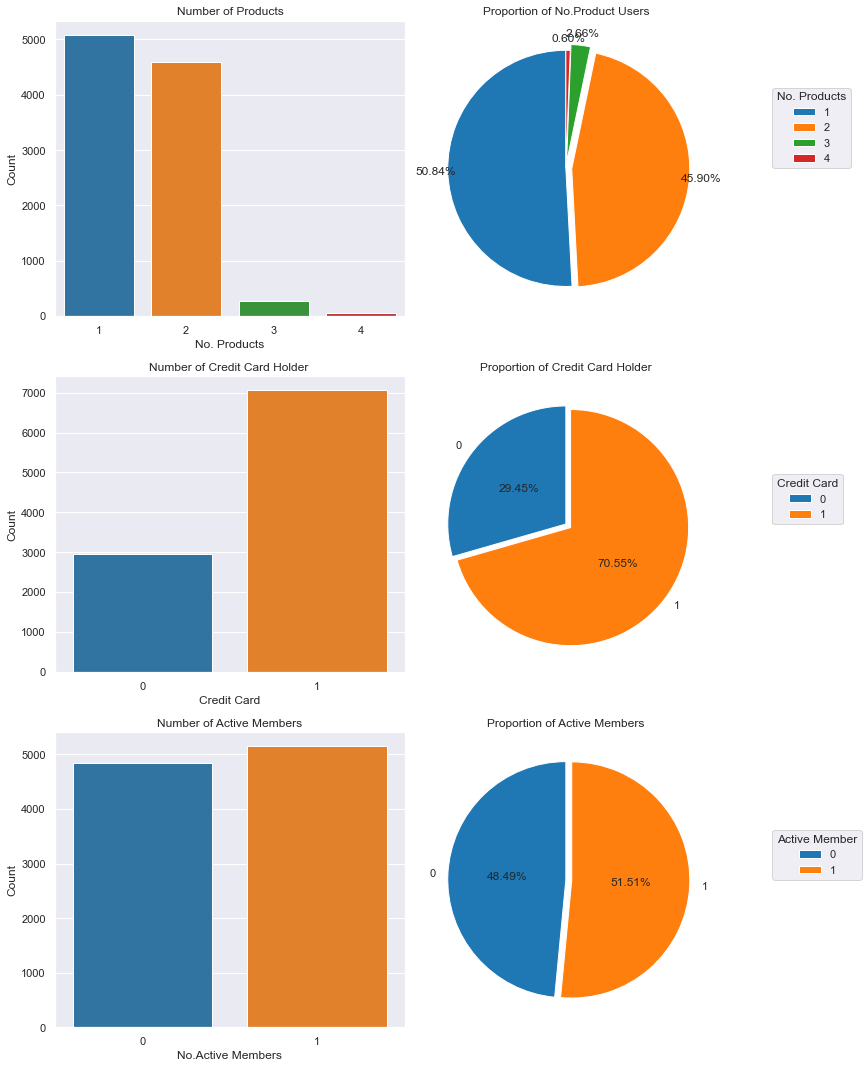

In [215]:
# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(12, 15))
sns.set_palette('tab10')
# NumOfProducts Column
## First subplot: CountPlot 
sns.countplot(data=df, x='NumOfProducts', ax=ax[0, 0])
ax[0, 0].set_title('Number of Products')
ax[0, 0].set_xlabel('No. Products')
ax[0, 0].set_ylabel('Count')

# Second subplot: Pie chart
No_ProdCount = df['NumOfProducts'].value_counts()
ax[0, 1].pie(No_ProdCount, autopct = '%.2f%%',
         pctdistance = 1.1,
         startangle = 90,
            explode = [0, 0.05, 0.05, 0])
ax[0, 1].set_title('Proportion of No.Product Users')
ax[0,1].legend(No_ProdCount.index, title="No. Products", loc=[1.2,0.5])


# HasCrCard Column
## First subplot: CountPlot 
No_CrCard = df['HasCrCard'].value_counts().sort_values (ascending = True)

sns.countplot(data=df, x='HasCrCard', ax=ax[1, 0])
ax[1,0].set_title('Number of Credit Card Holder ')
ax[1,0].set_xlabel('Credit Card')
ax[1,0].set_ylabel('Count')

## Second subplot: Pie chart
ax[1, 1].pie(No_CrCard, labels = No_CrCard.index, autopct = '%.2f%%',
         pctdistance = 0.5,
         startangle = 90,
            explode = [0,0.05])
ax[1, 1].set_title('Proportion of Credit Card Holder')
ax[1,1].legend(No_CrCard.index, title="Credit Card", loc=[1.2,0.5])


# IsActiveMember Column
## First subplot: CountPlot 

No_Active = df['IsActiveMember'].value_counts().sort_values (ascending = True)
sns.countplot(data=df, x='IsActiveMember', ax=ax[2, 0])
ax[2, 0].set_title('Number of Active Members')
ax[2, 0].set_xlabel('No.Active Members')
ax[2, 0].set_ylabel('Count')

# Second subplot: Pie chart
ax[2, 1].pie(No_Active, labels = No_Active.index, autopct = '%.2f%%',
         pctdistance = 0.5,
         startangle = 90,
            explode = [0,0.05])
ax[2, 1].set_title('Proportion of Active Members')
ax[2,1].legend(No_Active.index, title="Active Member", loc=[1.2,0.5])


plt.tight_layout()
plt.show()

## 2. Bivariate Analysis

### Number Variables with Churn 

In [216]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


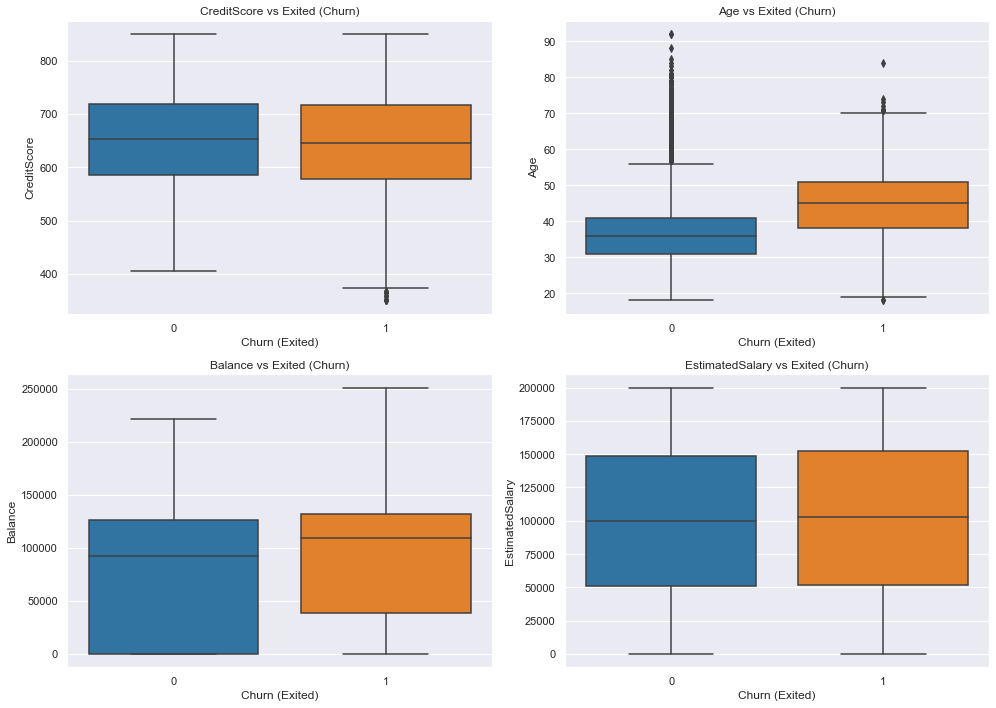

In [217]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Plotting the relationship between each numerical feature and churn (Exited)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel('Churn (Exited)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Categorical Variables with Churn

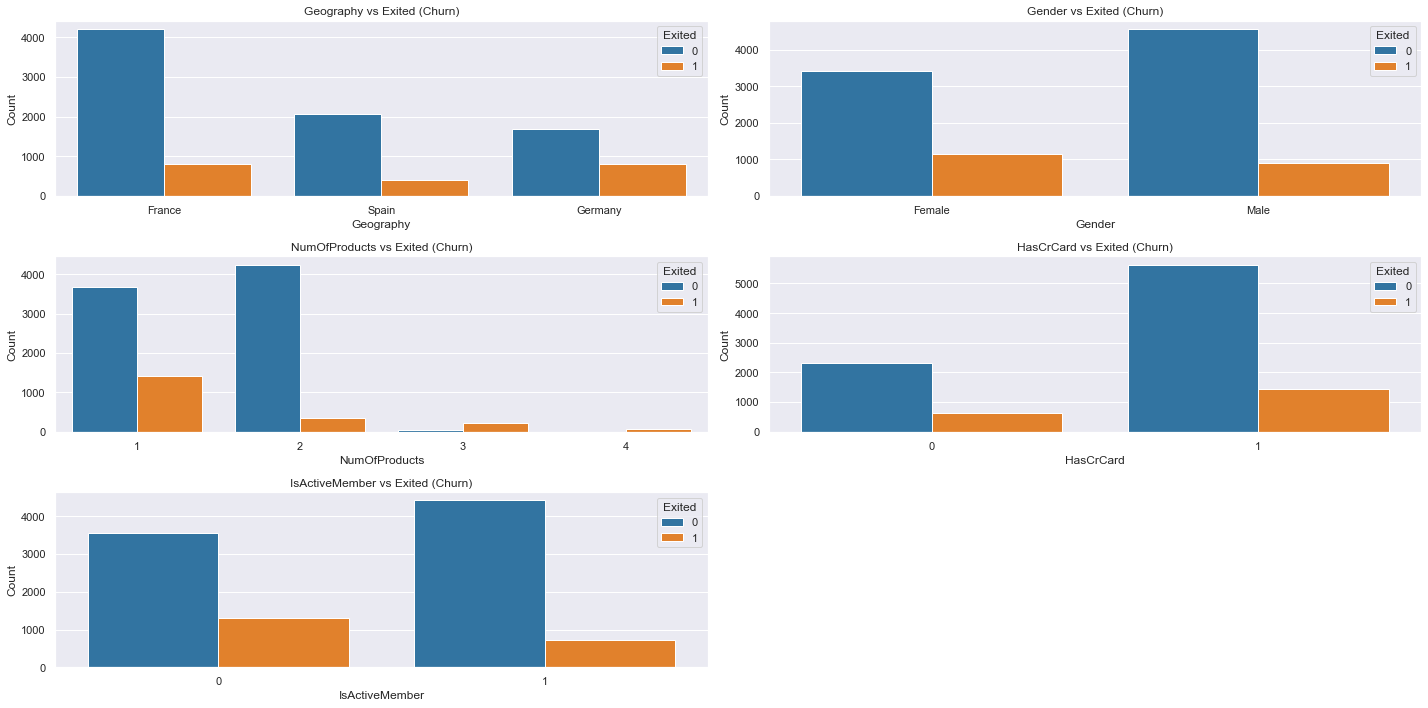

In [99]:
# List of categorical features to analyze
categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Plotting the relationship between each categorical feature and churn (Exited)
plt.figure(figsize=(20, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


> Findings:
>> Geography chart shows similar churn rates in France and Germany  (~ 8.1%) while 4.1% in Spain. \
>> Female, with 11.4% churn rate, tend to churn than Male, with only 9%.

Gender and Churn: Female customers demonstrate a higher churn rate (11.4%) compared to male customers (9%).
Age and Churn: Customers in the 40–50 age group exhibit the highest churn rate (7.9%), followed by those aged 30–40 (5.4%). Churn rates are lowest in the under-30 and over-60 groups.
Geography and Churn: France and Germany exhibit similar churn rates (8.1%), exceeding that of Spain (4.1%).
>
III. Customer Behavior Factors
Membership Activity and Churn: Inactive members demonstrate a significantly higher churn rate (13%) compared to active members.
Credit Card Ownership and Churn: Customers with credit cards churn at a higher rate (14.2%) than those without (6.1%).
Product Usage and Churn: Customers with at least one product have a higher churn rate (14.1%) compared to those with zero products.
Card Type and Churn: Clients with Diamond cards have the highest churn rate (5.5%), exceeding rates for other card types.
IV. Other Observations
Satisfaction Score Distribution: Satisfaction scores are relatively evenly distributed across their range (19–20% representation for each score).
Complaints and Churn: Customers marked as ‘Churned’ all have a history of complaints. This correlation warrants further investigation.

## 3. Multivariate Analysis

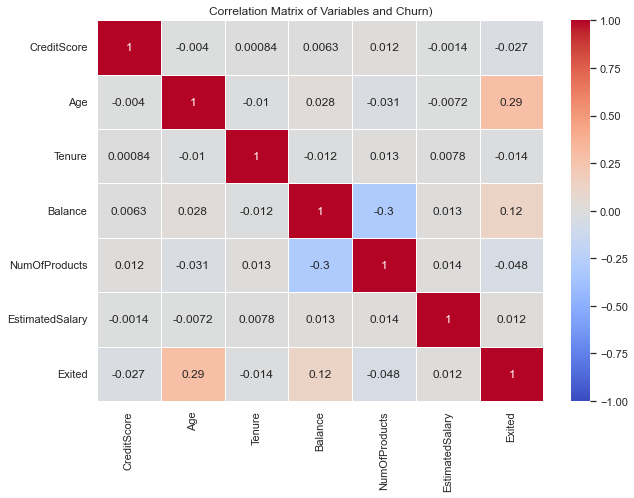

In [16]:
numerical_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
corr = df[numerical_variables].corr()

plt.figure(figsize=(10, 7))  # Set the size of the plot
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)


plt.title('Correlation Matrix of Variables and Churn)')
plt.show()

Age_Group
18-25     8.752735
26-35     7.759156
36-45    17.658880
46-55    48.148148
56+      38.775510
Name: Exited, dtype: float64


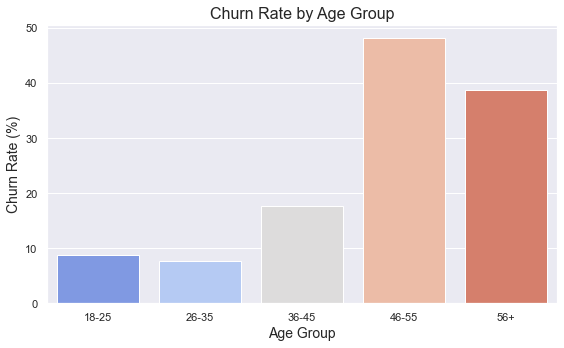

In [17]:
# Create age bins and labels
bins = [18, 25, 35, 45, 55, 100]  # Define the bins
labels = ['18-25', '26-35', '36-45', '46-55', '56+']  # Define the labels for bins

# Add a new column for Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# Group by Age Group and calculate churn rate
churn_rate_by_age = df.groupby('Age_Group')['Exited'].mean() * 100
print(churn_rate_by_age)
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_rate_by_age.index, y=churn_rate_by_age.values, palette='coolwarm')
plt.title('Churn Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()

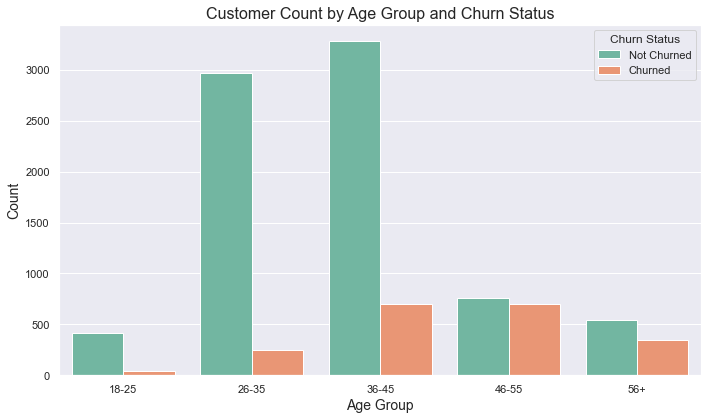

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', hue='Exited', palette='Set2')
plt.title('Customer Count by Age Group and Churn Status', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])
plt.tight_layout()
plt.show()


In [22]:
from scipy.stats import chi2_contingency

age_churn_table = pd.crosstab(df['Age_Group'], df['Exited'])
chi2, p, dof, expected = chi2_contingency(age_churn_table)
print(f"Chi-Square Test Statistic: {chi2}, p-value: {p}")

Chi-Square Test Statistic: 1249.7433215708293, p-value: 2.6192147663337326e-269


In [23]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
x = df[numerical_variables].iloc[:,:-1]
y = df[numerical_variables].iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.2, random_state = 42)

x_train_sm = sm.add_constant(x_train)

#Fit the logistic regression 

logit_model = sm.Logit(y_train, x_train_sm)


result = logit_model.fit()



print(result.summary())
from sklearn.metrics import accuracy_score

# Add a constant to the test set
x_test_sm = sm.add_constant(x_test)

# Predict probabilities using the fitted model
y_pred = result.predict(x_test_sm)

# Convert probabilities to binary classes
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)

print(f"Model Accuracy: {accuracy:.2f}")

Optimization terminated successfully.
         Current function value: 0.462922
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7993
Method:                           MLE   Df Model:                            6
Date:                Fri, 27 Dec 2024   Pseudo R-squ.:                 0.08862
Time:                        13:43:42   Log-Likelihood:                -3703.4
converged:                       True   LL-Null:                       -4063.5
Covariance Type:            nonrobust   LLR p-value:                2.690e-152
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.7049      0.256    -14.497      0.000      -4.206      -3.204
CreditScore   

In [24]:
from sklearn.metrics import accuracy_score

# Add a constant to the test set
x_test_sm = sm.add_constant(x_test)

# Predict probabilities using the fitted model
y_pred = result.predict(x_test_sm)

# Convert probabilities to binary classes
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79
